<a href="https://colab.research.google.com/github/Rashi2011/Rashi-Madhukar/blob/master/Programs%20in%20Tensorflow/Cat_Dog_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#importing libraries
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import pandas as pd
import matplotlib.pyplot as plt

In [0]:
#Downloading the Data
!wget --no-check-certificate \
    https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip \
    -O /tmp/cats_and_dogs_filtered.zip

--2020-05-22 12:31:11--  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.142.128, 2607:f8b0:400e:c09::80
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.142.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68606236 (65M) [application/zip]
Saving to: ‘/tmp/cats_and_dogs_filtered.zip’

/tmp/cats_and_dogs_ 100%[===================>]  65.43M   131MB/s    in 0.5s    

2020-05-22 12:31:12 (131 MB/s) - ‘/tmp/cats_and_dogs_filtered.zip’ saved [68606236/68606236]



***The contents of the .zip are extracted to the base directory /tmp/cats_and_dogs_filtered, which contains train and validation subdirectories for the training and validation datasets which in turn each contain cats and dogs subdirectories.***

In [0]:
import os
import zipfile
local_zip = '/tmp/cats_and_dogs_filtered.zip'
zip_ref = zipfile.ZipFile(local_zip,'r')
zip_ref.extractall('/tmp')
zip_ref.close()

*** Let's define each of these directories:***

In [0]:
#defining the directories
base_dir = '/tmp/cats_and_dogs_filtered'
train_dir = os.path.join(base_dir,'train')
validation_dir = os.path.join(base_dir,'validation')


In [0]:
#Directory with our training cat and dog pictures
train_cat_dir = os.path.join(train_dir,'cats')
train_dog_dir = os.path.join(train_dir,'dogs')

#Directory with our validation cat and dog pictures
validation_cat_dir = os.path.join(validation_dir,'cats')
validation_dog_dir = os.path.join(validation_dir,'dogs')

In [0]:
#seeing filenames of cats and dogs in training dir
train_cats_fname = os.listdir(train_cat_dir)
print(train_cats_fname)
train_dogs_fname = os.listdir(train_dog_dir)
print(train_dogs_fname)

['cat.119.jpg', 'cat.544.jpg', 'cat.810.jpg', 'cat.548.jpg', 'cat.823.jpg', 'cat.74.jpg', 'cat.452.jpg', 'cat.742.jpg', 'cat.871.jpg', 'cat.187.jpg', 'cat.506.jpg', 'cat.172.jpg', 'cat.745.jpg', 'cat.582.jpg', 'cat.164.jpg', 'cat.485.jpg', 'cat.412.jpg', 'cat.188.jpg', 'cat.44.jpg', 'cat.352.jpg', 'cat.331.jpg', 'cat.906.jpg', 'cat.430.jpg', 'cat.504.jpg', 'cat.907.jpg', 'cat.443.jpg', 'cat.30.jpg', 'cat.850.jpg', 'cat.511.jpg', 'cat.588.jpg', 'cat.27.jpg', 'cat.411.jpg', 'cat.191.jpg', 'cat.402.jpg', 'cat.820.jpg', 'cat.261.jpg', 'cat.262.jpg', 'cat.580.jpg', 'cat.639.jpg', 'cat.811.jpg', 'cat.867.jpg', 'cat.311.jpg', 'cat.401.jpg', 'cat.698.jpg', 'cat.860.jpg', 'cat.459.jpg', 'cat.940.jpg', 'cat.296.jpg', 'cat.755.jpg', 'cat.304.jpg', 'cat.419.jpg', 'cat.297.jpg', 'cat.121.jpg', 'cat.424.jpg', 'cat.713.jpg', 'cat.831.jpg', 'cat.300.jpg', 'cat.522.jpg', 'cat.161.jpg', 'cat.344.jpg', 'cat.870.jpg', 'cat.739.jpg', 'cat.854.jpg', 'cat.134.jpg', 'cat.228.jpg', 'cat.480.jpg', 'cat.574.jpg'

In [0]:
#seeing filenames of cats and dogs in validation dir
validation_cats_fname = os.listdir(validation_cat_dir)
print(validation_cats_fname)
validation_dogs_fname = os.listdir(validation_dog_dir)
print(validation_dogs_fname)

['cat.2488.jpg', 'cat.2326.jpg', 'cat.2379.jpg', 'cat.2176.jpg', 'cat.2281.jpg', 'cat.2224.jpg', 'cat.2177.jpg', 'cat.2007.jpg', 'cat.2220.jpg', 'cat.2151.jpg', 'cat.2349.jpg', 'cat.2252.jpg', 'cat.2348.jpg', 'cat.2367.jpg', 'cat.2205.jpg', 'cat.2133.jpg', 'cat.2025.jpg', 'cat.2287.jpg', 'cat.2398.jpg', 'cat.2444.jpg', 'cat.2003.jpg', 'cat.2009.jpg', 'cat.2467.jpg', 'cat.2094.jpg', 'cat.2373.jpg', 'cat.2418.jpg', 'cat.2141.jpg', 'cat.2425.jpg', 'cat.2356.jpg', 'cat.2173.jpg', 'cat.2084.jpg', 'cat.2175.jpg', 'cat.2215.jpg', 'cat.2148.jpg', 'cat.2311.jpg', 'cat.2213.jpg', 'cat.2357.jpg', 'cat.2298.jpg', 'cat.2140.jpg', 'cat.2384.jpg', 'cat.2015.jpg', 'cat.2230.jpg', 'cat.2385.jpg', 'cat.2386.jpg', 'cat.2199.jpg', 'cat.2030.jpg', 'cat.2457.jpg', 'cat.2246.jpg', 'cat.2000.jpg', 'cat.2465.jpg', 'cat.2269.jpg', 'cat.2171.jpg', 'cat.2259.jpg', 'cat.2181.jpg', 'cat.2258.jpg', 'cat.2407.jpg', 'cat.2334.jpg', 'cat.2073.jpg', 'cat.2492.jpg', 'cat.2239.jpg', 'cat.2478.jpg', 'cat.2431.jpg', 'cat.20

In [0]:
#Finding total number of cats and dogs images in both the directories
print("no of train_cat",len(os.listdir(train_cat_dir)))
print("no of train_dog",len(os.listdir(train_dog_dir)))
print("no of validation_cat",len(os.listdir(validation_cat_dir)))
print("no of validation_dog",len(os.listdir(validation_dog_dir)))

no of train_cat 1000
no of train_dog 1000
no of validation_cat 500
no of validation_dog 500


In [0]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Parameters for our graph; we'll output images in a 4x4 configuration
nrows = 4
ncols = 4

# Index for iterating over images
pic_index = 0

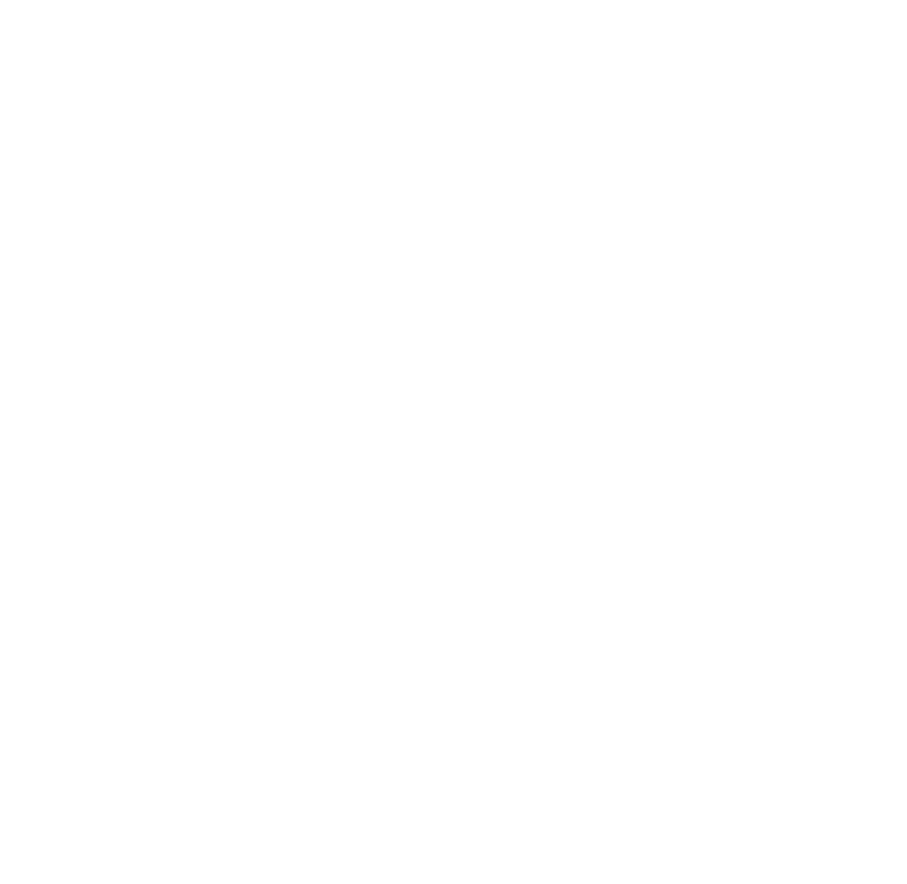

In [0]:
# Set up matplotlib fig, and size it to fit 4x4 pics
fig = plt.gcf()
fig.set_size_inches(ncols * 4, nrows * 4)

pic_index += 8
next_cat_pix = [os.path.join(train_cat_dir, fname) 
                for fname in train_cats_fname[pic_index-8:pic_index]]
next_dog_pix = [os.path.join(train_dog_dir, fname) 
                for fname in train_dogs_fname[pic_index-8:pic_index]]

for i, img_path in enumerate(next_cat_pix+next_dog_pix):
  # Set up subplot; subplot indices start at 1
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off') # Don't show axes (or gridlines)

  img = mpimg.imread(img_path)
  #plt.imshow(img)

#plt.show()


In [0]:
from tensorflow.keras.preprocessing.image import img_to_array,load_img

img = load_img(img_path,target_size = (150,150))
print(type(img))
X = img_to_array(img)
print(type(X),X.shape)
#Rescale
X = X.reshape((1,)+X.shape)
X = X/255.0
print(X.shape)

<class 'PIL.Image.Image'>
<class 'numpy.ndarray'> (150, 150, 3)
(1, 150, 150, 3)


In [0]:
#Defining the Convolution model
model = tf.keras.Sequential([
                             tf.keras.layers.Conv2D(64,(3,3),input_shape = (150,150,3)),
                             tf.keras.layers.MaxPool2D(2,2),
                             tf.keras.layers.Flatten(),
                             tf.keras.layers.Dense(128,activation = 'relu'),
                             tf.keras.layers.Dense(1,activation = 'sigmoid')
])

In [0]:
model.summary()
model.compile(optimizer = tf.optimizers.Adam(), loss= 'binary_crossentropy')

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 148, 148, 64)      1792      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 74, 74, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 350464)            0         
_________________________________________________________________
dense (Dense)                (None, 128)               44859520  
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 129       
Total params: 44,861,441
Trainable params: 44,861,441
Non-trainable params: 0
_________________________________________________________________


In [0]:
model.fit(X)